In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1. Data Cleaning
#2. EDA
#3. Text PreProcessing
#4. Model Building
#5. Evaluation
#6. Improvement
#7. Website
#8. Deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4' ], inplace=True)

In [8]:
df.sample

<bound method NDFrame.sample of         v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [9]:
df.rename(columns={'v1': 'target', 'v2':'text'}, inplace=True)

In [10]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#duplicate check
df.duplicated().sum()

403

In [15]:
#remove duplicate rows
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# 2. EDA

<Axes: xlabel='target', ylabel='Count'>

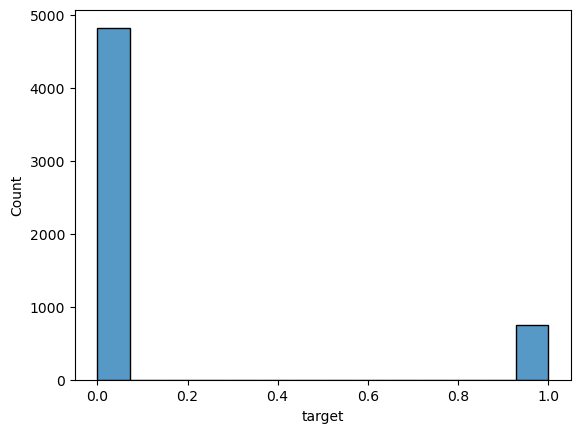

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(df['target'])

<Axes: ylabel='count'>

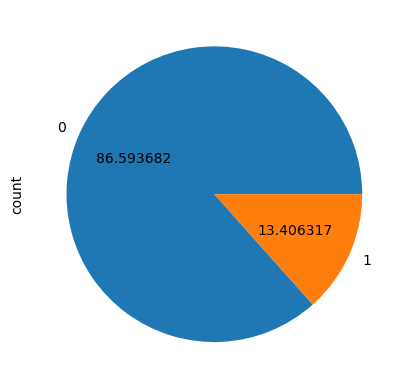

In [17]:
df['target'].value_counts().plot(kind='pie', autopct='%2f')

In [18]:
import nltk

In [19]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Anjal
[nltk_data]     Bhattarai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to C:\Users\Anjal
[nltk_data]     Bhattarai\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Anjal
[nltk_data]     Bhattarai\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
#find no. of character, words and length
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df['num_sent'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))

In [21]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df.describe()

,target,num_characters,num_words,num_sent
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,18.699390,1.996411
std,0.340751,59.690841,13.741932,1.520159
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.500000
75%,0.000000,121.000000,27.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [23]:
df[df['target'] == 0].describe()


,target,num_characters,num_words,num_sent
count,4825.0,4825.000000,4825.000000,4825.000000
mean,0.0,71.023627,17.276269,1.837720
std,0.0,58.016023,13.988585,1.454388
min,0.0,2.000000,1.000000,1.000000
25%,0.0,33.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,92.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [24]:
df[df['target'] == 1].describe()

,target,num_characters,num_words,num_sent
count,747.0,747.000000,747.000000,747.000000
mean,1.0,138.866131,27.891566,3.021419
std,0.0,29.183082,6.867007,1.537580
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.500000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


### Looks like spam message are greater in size.

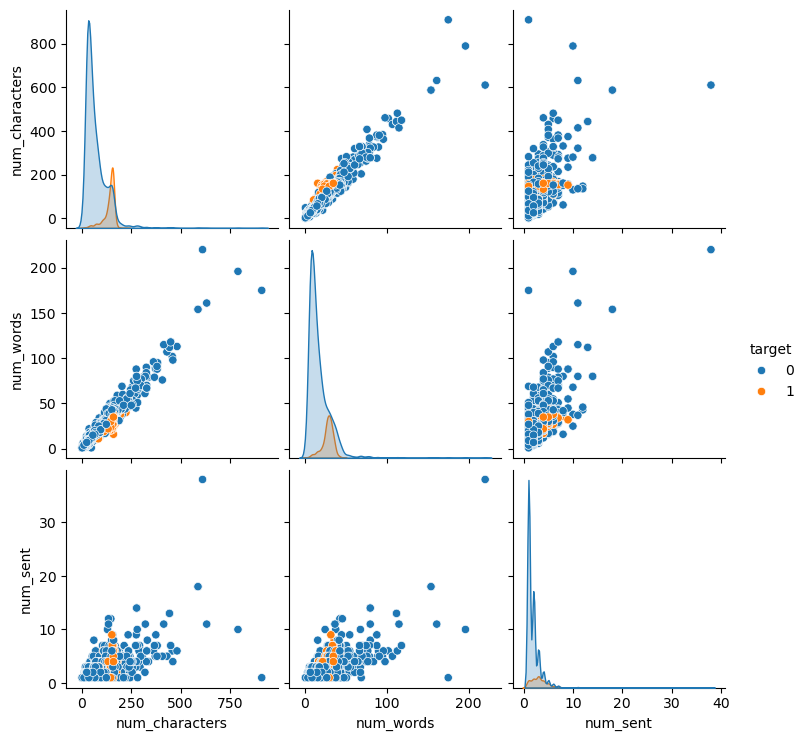

In [25]:
import seaborn as sns
sns.pairplot(df, hue='target')

In [26]:
#lots of outliers

In [27]:
numeric_df = df.select_dtypes(include='number')
numeric_df.corr()

,target,num_characters,num_words,num_sent
target,1.000000,0.387285,0.263221,0.265332
num_characters,0.387285,1.000000,0.966310,0.631881
num_words,0.263221,0.966310,1.000000,0.685165
num_sent,0.265332,0.631881,0.685165,1.000000


<Axes: >

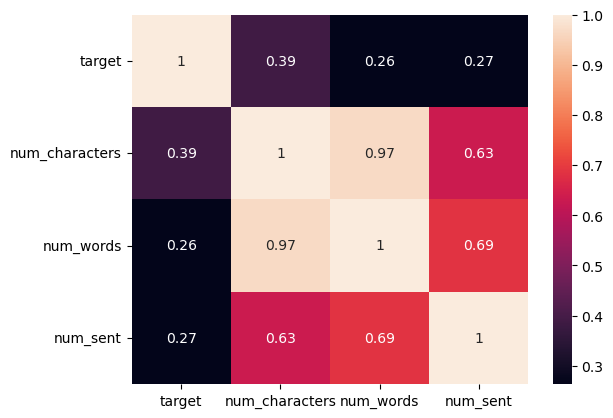

In [28]:
sns.heatmap(numeric_df.corr(), annot=True)

### **since, cols correlated to each other --> can cause MULTI-COLLINEARITY; so - we take only 1 column**
 ***target col must defined by num_characters*** so we'll consier that

# 3. Data Preprocessing
- lower case
- tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming


In [29]:
from nltk.corpus import stopwords

In [30]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [31]:
def transform_text(text):
    #i. lowercase
    text = text.lower() 

    #ii. Split into list of words
    text = nltk.word_tokenize(text) 
    
    y=[]
    #iii.  Nospecial character --> not even punctuations
    for i in text:     
        if i.isalnum():
            y.append(i)

    text=y[:] 
    y.clear()

    #iv. Remove stop-words [not a meaning caryying]
    for i in text:      
        if i not in stopwords.words('english'):
            y.append(i)


    text=y[:] 
    y.clear()

    #v. stemming [transforming to root word; dancing--> danc]
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [32]:
transform_text('Hi there, is your age currently 20 ?')

'hi age current 20'

In [33]:
df['transformed_text'] = df['text'].apply(transform_text)

In [34]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [35]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=300, min_font_size=10, background_color='white')

In [36]:
spam_wc = wc.generate(df[df['target'] == 1 ]['transformed_text'].str.cat(sep=" "))

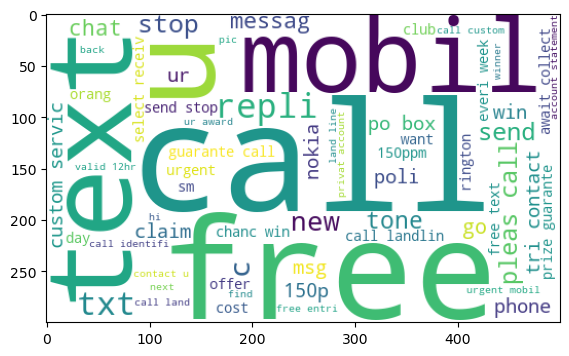

In [37]:
plt.figure(figsize=(10, 4))

plt.imshow(spam_wc)

In [38]:
spam_wc = wc.generate(df[df['target'] == 0 ]['transformed_text'].str.cat(sep=" "))

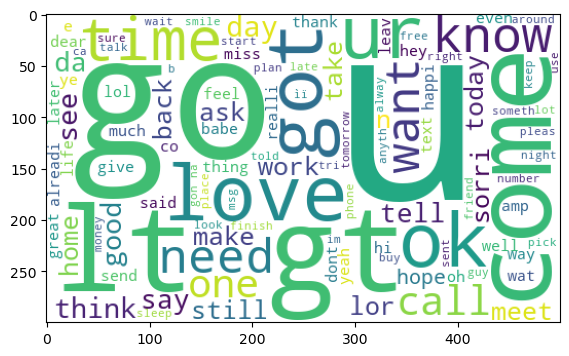

In [39]:
plt.figure(figsize=(10, 4))
plt.imshow(spam_wc)

In [40]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [41]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

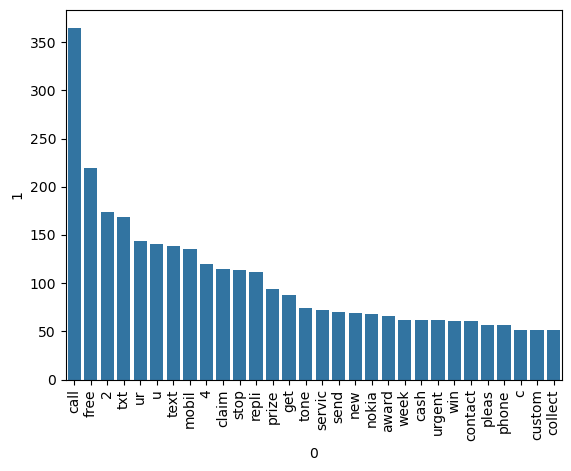

In [42]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

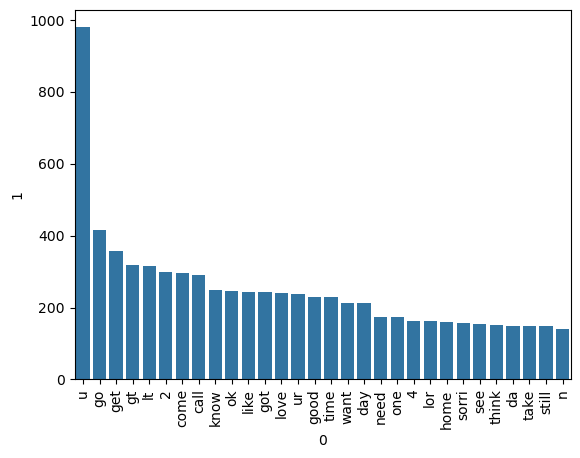

In [44]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [45]:
df.head()

,target,text,num_characters,num_words,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building
**Naive-Bais usually perform better for textual data**

In [106]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer #countvectorizer is bag method...
cv = CountVectorizer()
tfidfv = TfidfVectorizer()

In [107]:
X = cv.fit_transform(df['transformed_text']).toarray()
X = tfidfv.fit_transform(df['transformed_text']).toarray()

In [108]:
X.shape

(5572, 6708)

In [109]:
y = df['target'].values

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [111]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [112]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [113]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [114]:
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8600896860986547
[[826 139]
 [ 17 133]]
0.4889705882352941


In [115]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9632286995515695
[[965   0]
 [ 41 109]]
1.0


In [88]:
# multinomial naive bayes with tfidfVectorizer --> using this for our model as we got 100% precision score....

# let's try almost all classification algorithms.... [didn't worked out]

In [89]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [90]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [91]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [92]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [93]:
train_classifier(svc,X_train,y_train,X_test,y_test)


(0.9748878923766816, 0.9621212121212122)

In [94]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9748878923766816
Precision -  0.9621212121212122
For  KN
Accuracy -  0.9121076233183857
Precision -  1.0
For  NB
Accuracy -  0.9632286995515695
Precision -  1.0
For  DT
Accuracy -  0.9434977578475336
Precision -  0.8849557522123894
For  LR
Accuracy -  0.9426008968609866
Precision -  0.9056603773584906
For  RF
Accuracy -  0.9757847533632287
Precision -  1.0


C:\Users\Anjal Bhattarai\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9614349775784753
Precision -  0.9652173913043478
For  BgC
Accuracy -  0.9713004484304932
Precision -  0.9214285714285714
For  ETC
Accuracy -  0.9757847533632287
Precision -  0.992
For  GBDT
Accuracy -  0.957847533632287
Precision -  0.9904761904761905
For  xgb
Accuracy -  0.9704035874439462
Precision -  0.9606299212598425


In [100]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912108,1.000000
2,NB,0.963229,1.000000
5,RF,0.975785,1.000000
8,ETC,0.975785,0.992000
9,GBDT,0.957848,0.990476
6,AdaBoost,0.961435,0.965217
0,SVC,0.974888,0.962121
10,xgb,0.970404,0.960630
7,BgC,0.971300,0.921429
4,LR,0.942601,0.905660


### Still... Naive Biase is great

## Let's create Pipeline
1. Text transformation
2. Vectorization
3. Model building

In [116]:
import pickle
pickle.dump(tfidfv, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))